In [1]:
import MDAnalysis as mda
import numpy as np
from MDAnalysis.lib.distances import distance_array

In [2]:
u = mda.Universe('./md_c.gro', 'md_f.xtc')
# select first set of residues; in this example resids 21 - 27
#residues1 = u.select_atoms('resid 438:440').residues
# select second set of residues; in this example resids 38 - 42
#residues2 = u.select_atoms('resid 723').residues
# calculate distances between each CA in first group with each CA in second group


In [3]:
distance1 = []
distance2 = []
distance3 = []
distance4 = []
time_ps = []

residues1 = u.select_atoms('resid 438:440').residues
residues2 = u.select_atoms('resid 723').residues

for ts in u.trajectory:
    time_ps.append(u.trajectory.time)
    residues1_com = np.array(residues1.center_of_mass())
    center_of_masses_of_NAG = [res.atoms.center_of_mass() for res in residues2]
    
    
    distance1.append(distance_array(residues1_com, center_of_masses_of_NAG[0])[0][0])
    distance2.append(distance_array(residues1_com, center_of_masses_of_NAG[1])[0][0])
    distance3.append(distance_array(residues1_com, center_of_masses_of_NAG[2])[0][0])
    distance4.append(distance_array(residues1_com, center_of_masses_of_NAG[3])[0][0])


In [4]:
import matplotlib.pyplot as plt

In [5]:
average = [(distance1[i] + distance2[i] + distance3[i] + distance4[i]) / 4 for i in range(len(time_ps))]

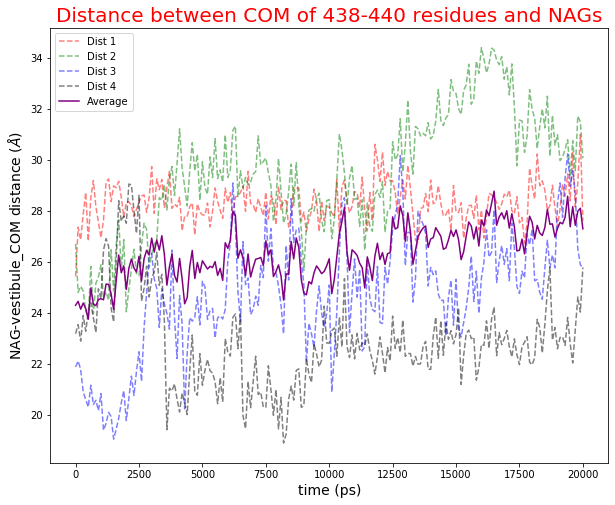

In [7]:
fig = plt.figure(figsize = (10, 8))

plt.plot(time_ps, distance1, 'r--', label="Dist 1", color = "red", alpha = 0.5)
plt.plot(time_ps, distance2, 'r--', label="Dist 2", color = "green", alpha = 0.5)
plt.plot(time_ps, distance3, 'r--', label="Dist 3", color = "blue", alpha = 0.5)
plt.plot(time_ps, distance4, 'r--', label="Dist 4", color = "black", alpha = 0.5)

plt.plot(time_ps, average, label="Average", color = "purple")

plt.xlabel("time (ps)", fontsize = 14)
plt.ylabel(r"NAG-vestibule_COM distance ($\AA$)", fontsize = 14)
plt.title("Distance between COM of 438-440 residues and NAGs", fontsize = 20, color = "red")

plt.savefig("Distances_NAG.png")
plt.legend()

plt.show()